# Dataset Description

| **Column Attribute** | **Description** | **Units** | **Data Type** |
|-----------------------|-----------------|-----------|---------------|
| **Patient Number**    | Identifies patients by number | -         | Numerical     |
| **Cholesterol**       | Total cholesterol            | mg/dl     | Numerical     |
| **Glucose**           | Fasting blood sugar          | mg/dl     | Numerical     |
| **HDL**               | HDL or good cholesterol      | mg/dl     | Numerical     |
| **Chol/HDL**          | Ratio of total cholesterol to good cholesterol. Desirable result is < 5 | - | Numerical |
| **Age**               | All adult African Americans  | -         | Numerical     |
| **Gender**            | 162 males, 228 females       | -         | Nominal       |
| **Height**            | In inches                   | inches    | Numerical     |
| **Weight**            | In pounds                   | lbs       | Numerical     |
| **BMI**               | 703 x weight (lbs) / [height (inches)]² | - | Numerical |
| **Systolic BP**       | The upper number of blood pressure | mmHg  | Numerical     |
| **Diastolic BP**      | The lower number of blood pressure | mmHg | Numerical     |
| **Waist**             | Measured in inches          | inches    | Numerical     |
| **Hip**               | Measured in inches          | inches    | Numerical     |
| **Waist/Hip**         | Ratio is possibly a stronger risk factor for heart disease than BMI | - | Numerical |
| **Diabetes**          | Yes (60), No (330)          | -         | Nominal       |


# Features Relationships in the Dataset

### 1. Glucose and Diabetes
Hypothesis: Diabetic patients are expected to have significantly higher fasting glucose levels compared to non-diabetic individuals.

### 2. BMI and Diabetes
Hypothesis: Obese and overweight individuals are more likely to be diabetic due to the strong association between body fat and insulin resistance.

### 3. Cholesterol and HDL
Hypothesis: Diabetic patients are likely to have higher total cholesterol levels and lower HDL levels, which increases the risk of cardiovascular complications.

### 4. Blood Pressure (Systolic and Diastolic)
Hypothesis: Diabetic patients are more likely to have elevated systolic and diastolic blood pressure due to the correlation between hypertension and diabetes.

### 5. Age and Diabetes
Hypothesis: The prevalence of diabetes increases with age, particularly among individuals over 45 years.

### 6. Waist-to-Hip Ratio
Hypothesis: A higher waist-to-hip ratio is a stronger indicator of abdominal obesity, which is closely linked to insulin resistance and diabetes.
### 7. Chol/HDL Ratio
Hypothesis: A higher Chol/HDL ratio indicates poorer lipid profiles and is often observed in diabetic patients.

# Importing Libraries and Loading Data

Libraries

In [19]:
# Essentials
import pandas as pd

# Processing
from sklearn.preprocessing import LabelEncoder

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

Data

In [20]:
data_path = r"C:\Users\dahab\OneDrive\Desktop\T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making\datasets\clinical\African_clinical_dataset.csv"
african_df = pd.read_csv(data_path)

# Exploratory Data Analysis (EDA) and Cleaning

Display basic information about the dataset

In [21]:
print("Dataset Info:")
african_df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Patient number   390 non-null    int64  
 1   Cholesterol      390 non-null    int64  
 2   Glucose          390 non-null    int64  
 3   HDL Chol         390 non-null    int64  
 4   Chol/HDL ratio   390 non-null    float64
 5   Age              390 non-null    int64  
 6   Gender           390 non-null    object 
 7   Height           390 non-null    int64  
 8   Weight           390 non-null    int64  
 9   BMI              390 non-null    float64
 10  Systolic BP      390 non-null    int64  
 11  Diastolic BP     390 non-null    int64  
 12  waist            390 non-null    int64  
 13  hip              390 non-null    int64  
 14  Waist/hip ratio  390 non-null    float64
 15  Diabetes         390 non-null    object 
dtypes: float64(3), int64(11), object(2)
memory usage

Display the first few rows of the dataset

In [22]:
print("\nFirst 5 rows of the dataset:")
african_df.head()


First 5 rows of the dataset:


,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes
0,1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes
1,2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes
2,3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes
3,4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes
4,5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes


Check for missing values

In [23]:
print("\nMissing Values:")
print(african_df.isnull().sum())


Missing Values:
Patient number     0
Cholesterol        0
Glucose            0
HDL Chol           0
Chol/HDL ratio     0
Age                0
Gender             0
Height             0
Weight             0
BMI                0
Systolic BP        0
Diastolic BP       0
waist              0
hip                0
Waist/hip ratio    0
Diabetes           0
dtype: int64


Check for duplicate rows

In [24]:
print("\nDuplicate Rows:")
print(african_df.duplicated().sum())


Duplicate Rows:
0


Basic statistics of the dataset

In [25]:
print("\nDataset Description:")
african_df.describe()


Dataset Description:


,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,195.500000,207.230769,107.338462,50.266667,4.524615,46.774359,65.951282,177.407692,28.775641,137.133333,83.289744,37.869231,42.992308,0.881385
std,112.727548,44.666005,53.798188,17.279069,1.736634,16.435911,3.918867,40.407824,6.600915,22.859528,13.498192,5.760947,5.664342,0.073212
min,1.000000,78.000000,48.000000,12.000000,1.500000,19.000000,52.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000,0.680000
25%,98.250000,179.000000,81.000000,38.000000,3.200000,34.000000,63.000000,150.250000,24.100000,122.000000,75.000000,33.000000,39.000000,0.830000
50%,195.500000,203.000000,90.000000,46.000000,4.200000,44.500000,66.000000,173.000000,27.800000,136.000000,82.000000,37.000000,42.000000,0.880000
75%,292.750000,229.000000,107.750000,59.000000,5.400000,60.000000,69.000000,200.000000,32.275000,148.000000,90.000000,41.000000,46.000000,0.930000
max,390.000000,443.000000,385.000000,120.000000,19.300000,92.000000,76.000000,325.000000,55.800000,250.000000,124.000000,56.000000,64.000000,1.140000


Drop the first column `Patient Number`

In [26]:
african_df = african_df.drop(columns=['Patient number'])
african_df.columns.tolist()

['Cholesterol',
 'Glucose',
 'HDL Chol',
 'Chol/HDL ratio',
 'Age',
 'Gender',
 'Height',
 'Weight',
 'BMI',
 'Systolic BP',
 'Diastolic BP',
 'waist',
 'hip',
 'Waist/hip ratio',
 'Diabetes']

Check categorical columns

In [27]:
cat_columns = african_df.select_dtypes(include=['object', 'category']).columns
print("\nCategorical Columns:", list(cat_columns))


Categorical Columns: ['Gender', 'Diabetes']


Analyze categorical variables


Value counts for Gender:
Gender
female    228
male      162
Name: count, dtype: int64


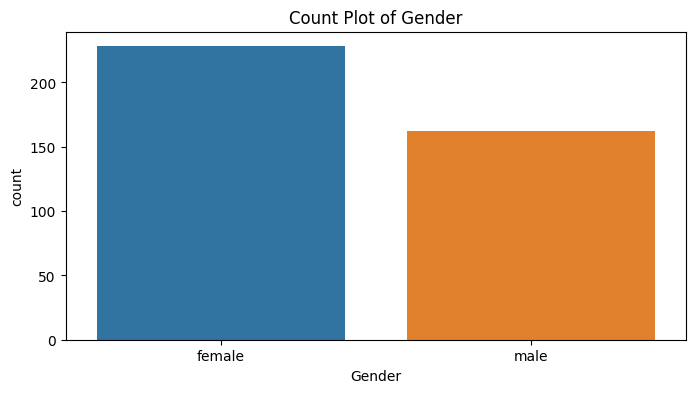


Value counts for Diabetes:
Diabetes
No diabetes    330
Diabetes        60
Name: count, dtype: int64


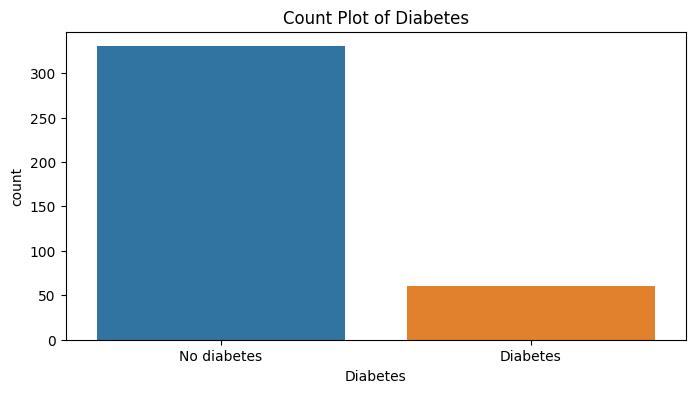

In [28]:
for col in cat_columns:
    print(f"\nValue counts for {col}:")
    print(african_df[col].value_counts())
    plt.figure(figsize=(8, 4))
    sns.countplot(data=african_df, x=col, order=african_df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.show()

# Data Visualization

Visualize Distributions of Numerical Features

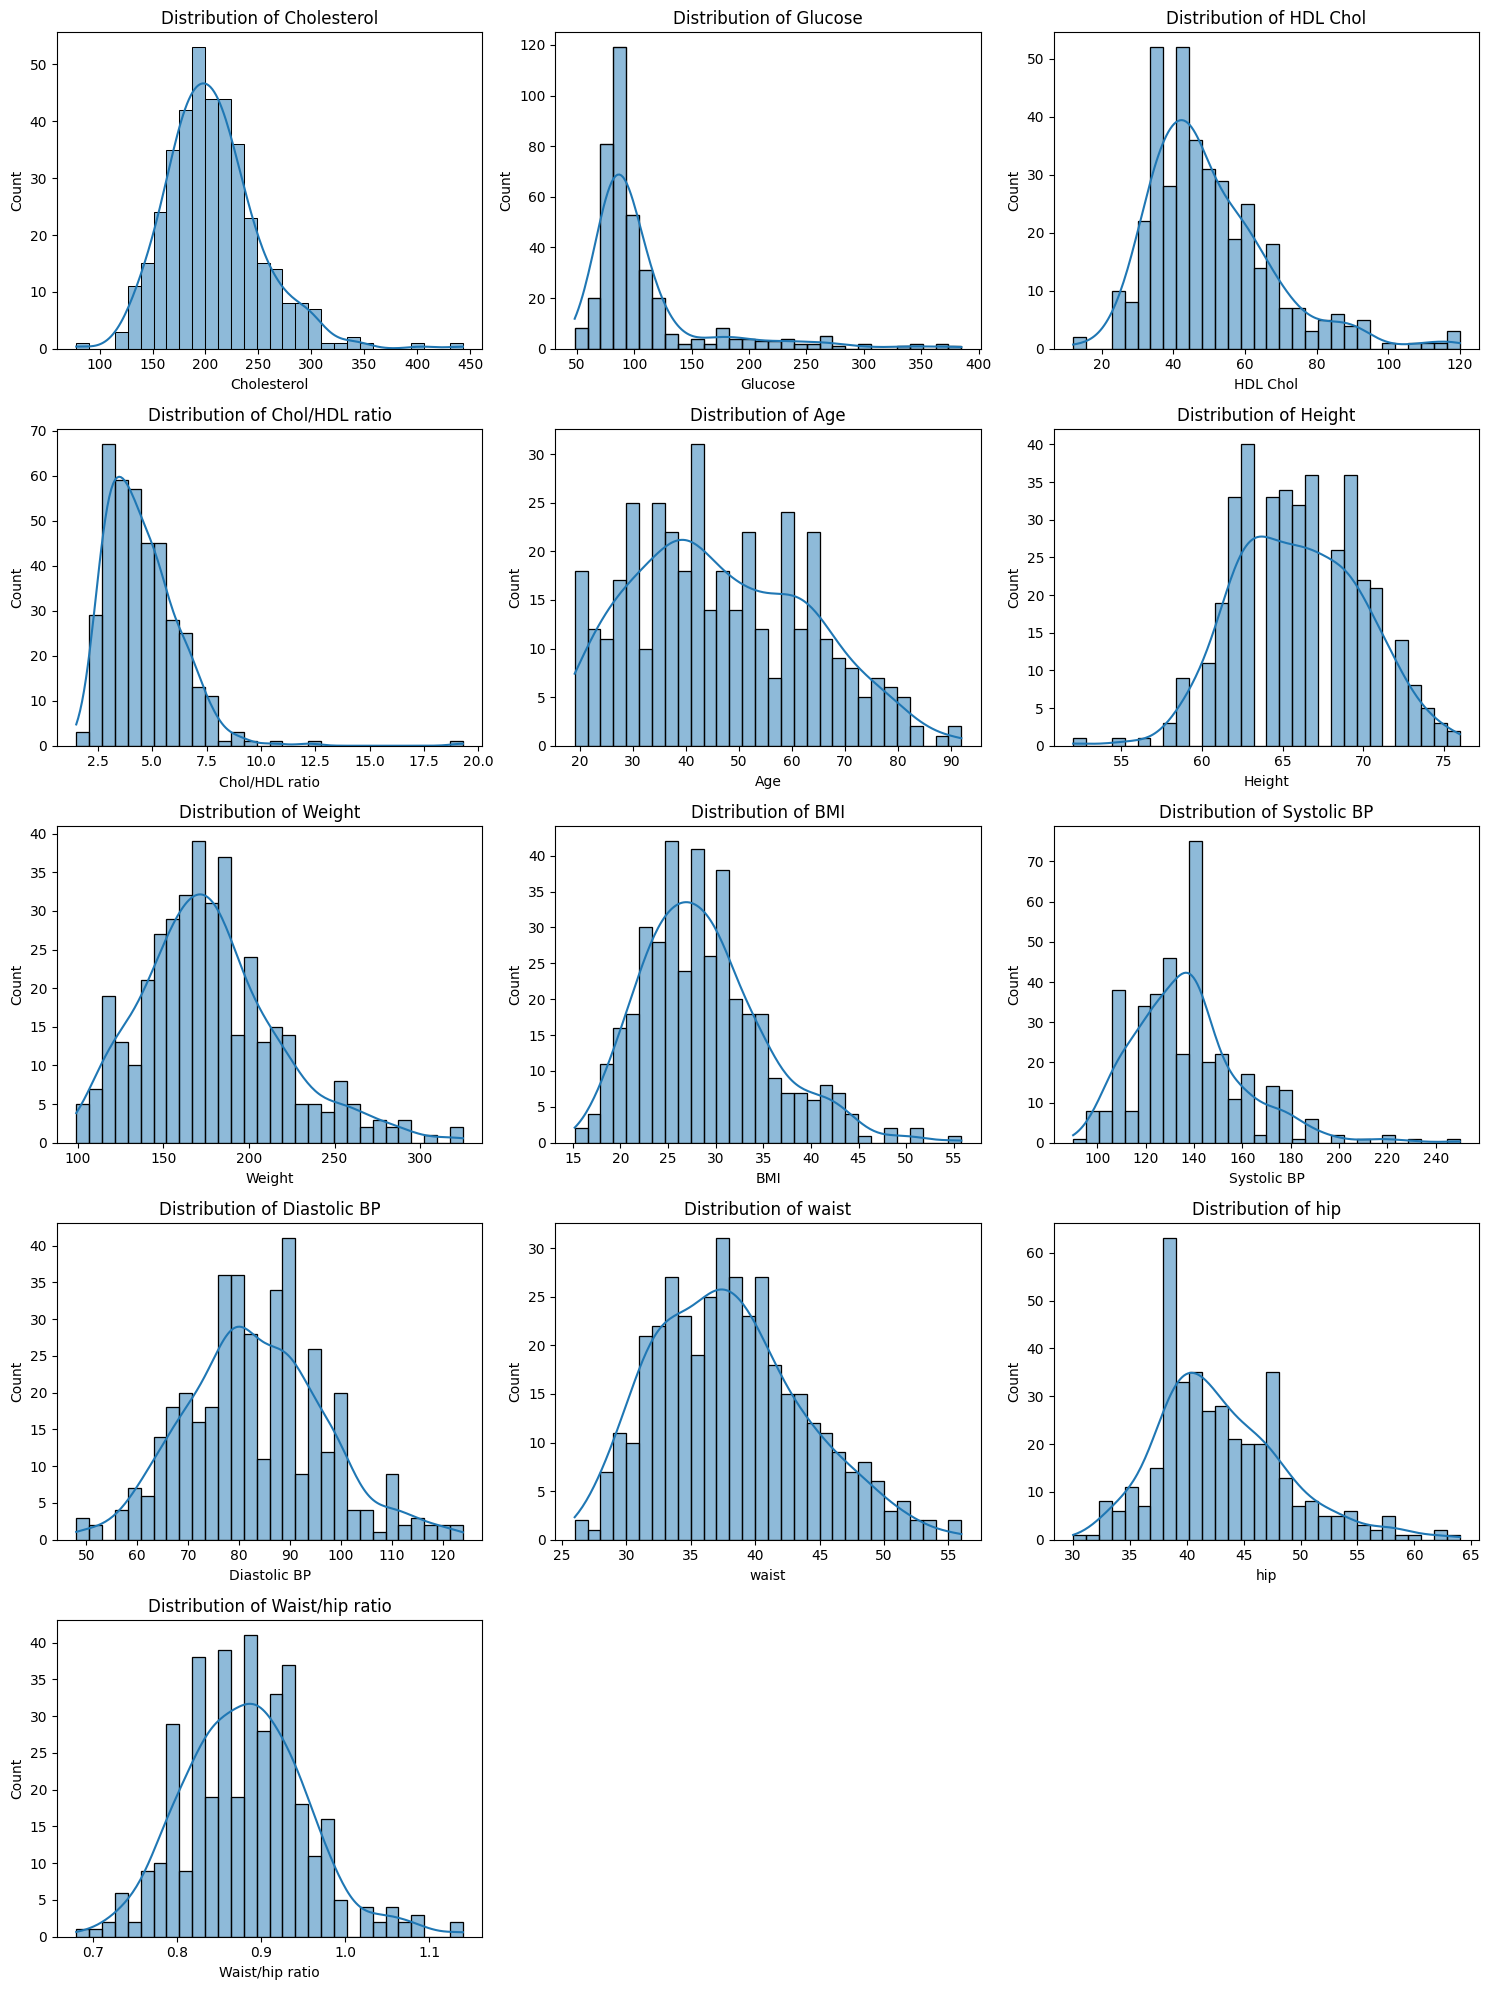

In [29]:
# Selecting all numeric columns in the African dataset
num_columns = african_df.select_dtypes(include=['float64', 'int64']).columns

# Plotting histograms with KDE in a grid layout (3 per row)
n_cols = 3
n_rows = (len(num_columns) + n_cols - 1) // n_cols  # Calculate required rows

plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust figure size based on number of plots

for i, col in enumerate(num_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(african_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()

plt.show()

Correlation heatmap

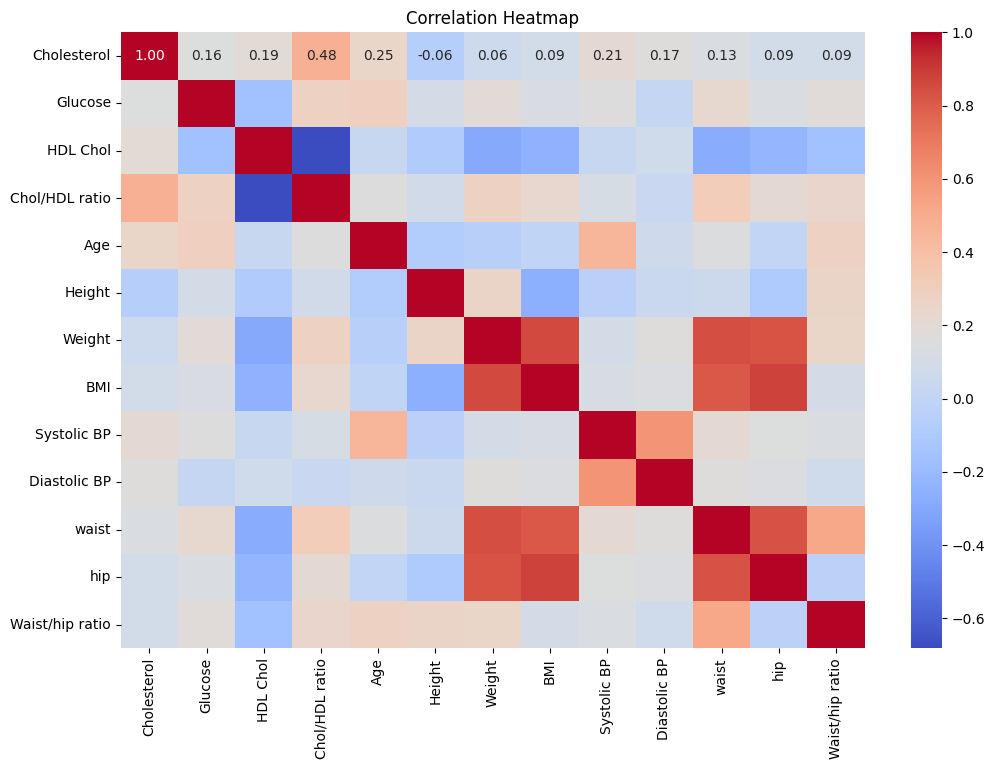

In [30]:
# Select only numerical columns for the correlation matrix
numerical_data = african_df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Pairplot for Numerical Variables

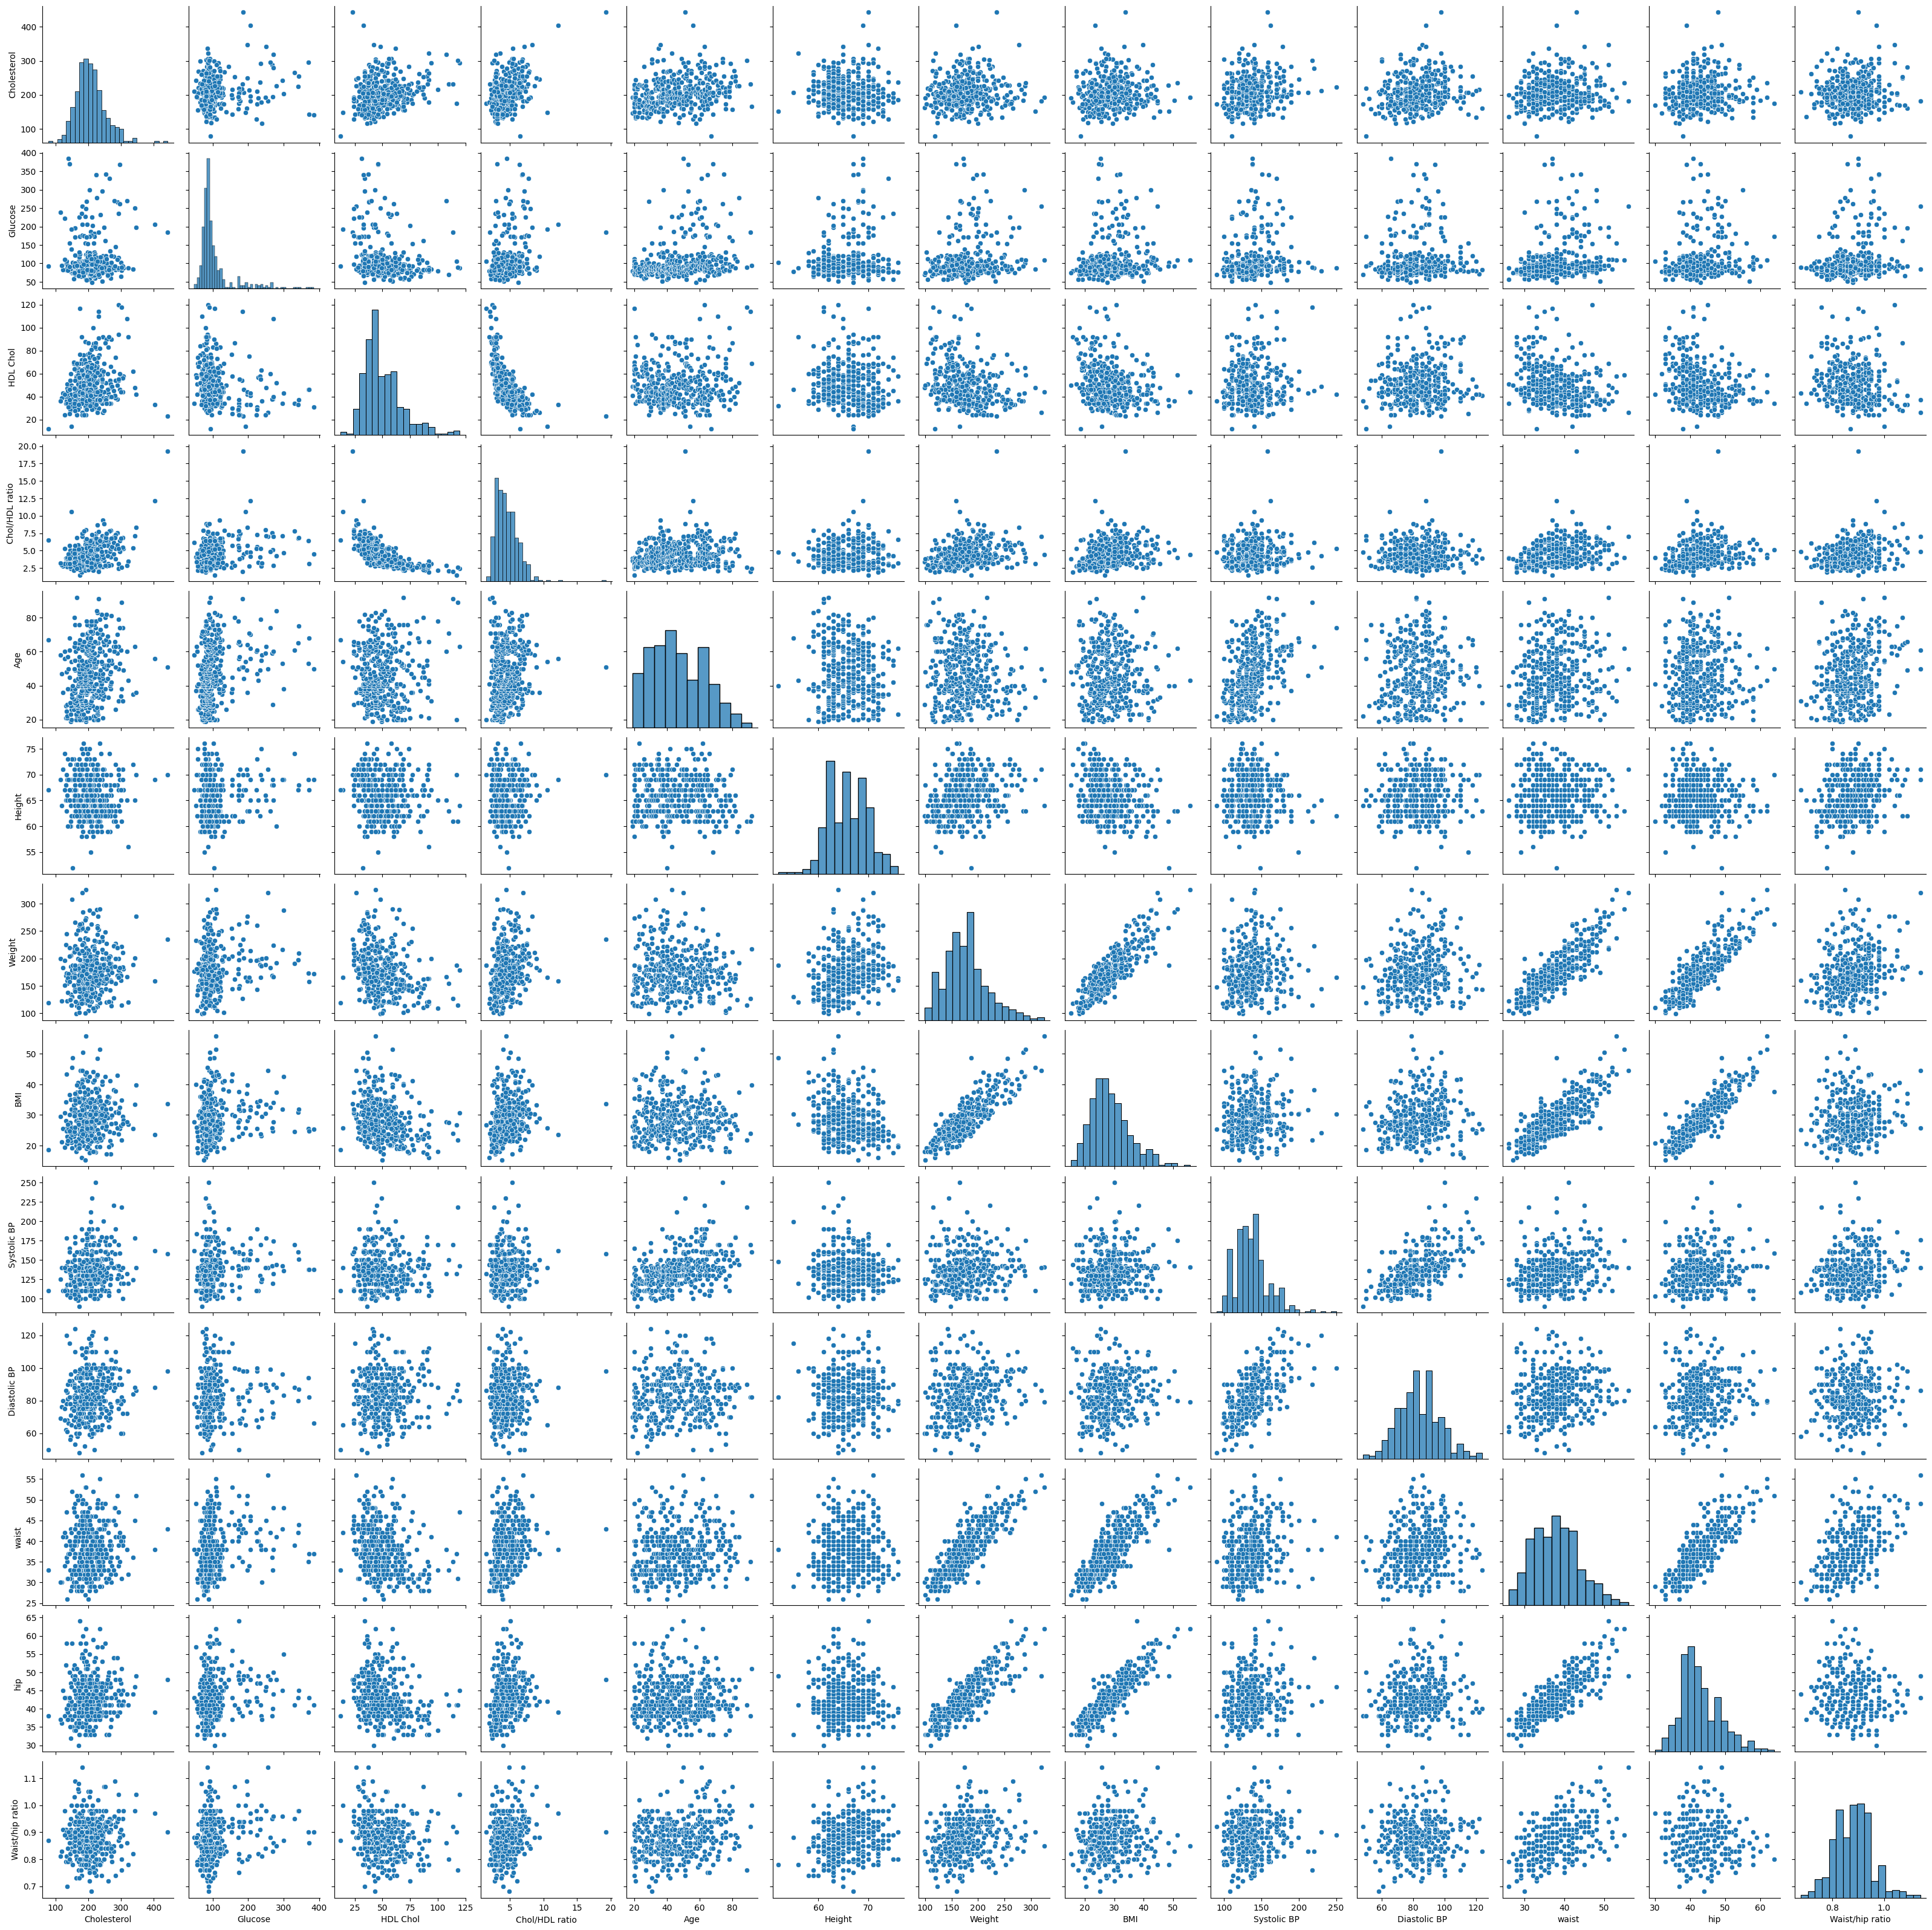

In [31]:
sns.pairplot(african_df[num_columns])
plt.show()

`BMI` vs `Waist`/`Hip ratio` (colored by `Diabetes`)

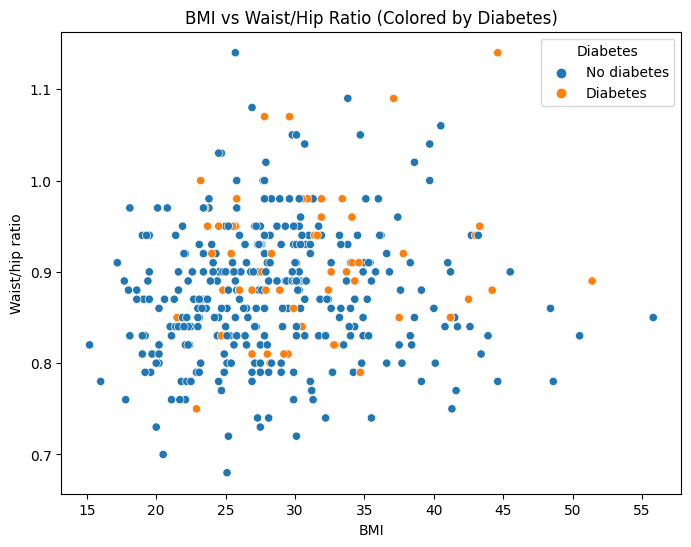

In [32]:
# Plotting BMI vs Waist/Hip ratio colored by diabetes status
plt.figure(figsize=(8, 6))
sns.scatterplot(data=african_df, x="BMI", y="Waist/hip ratio", hue="Diabetes")
plt.title("BMI vs Waist/Hip Ratio (Colored by Diabetes)")
plt.show()

`Systolic BP` by `Gender`

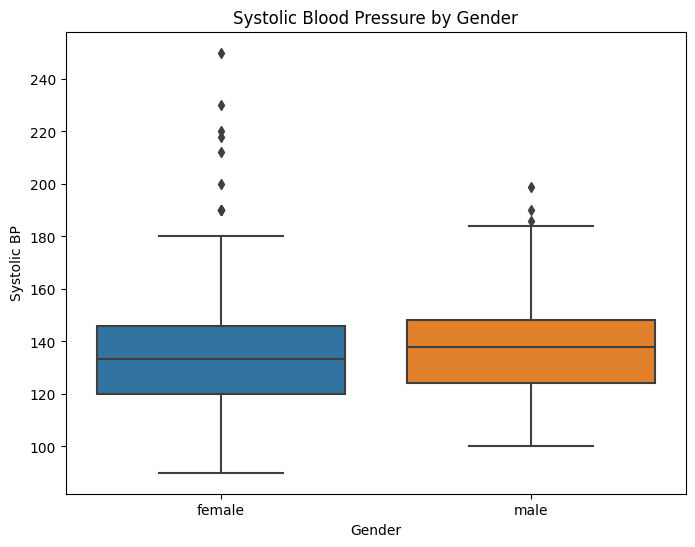

In [33]:
# Plotting a boxplot of systolic blood pressure grouped by gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=african_df, x="Gender", y="Systolic BP")
plt.title("Systolic Blood Pressure by Gender")
plt.show()

`Cholesterol` by `Gender`

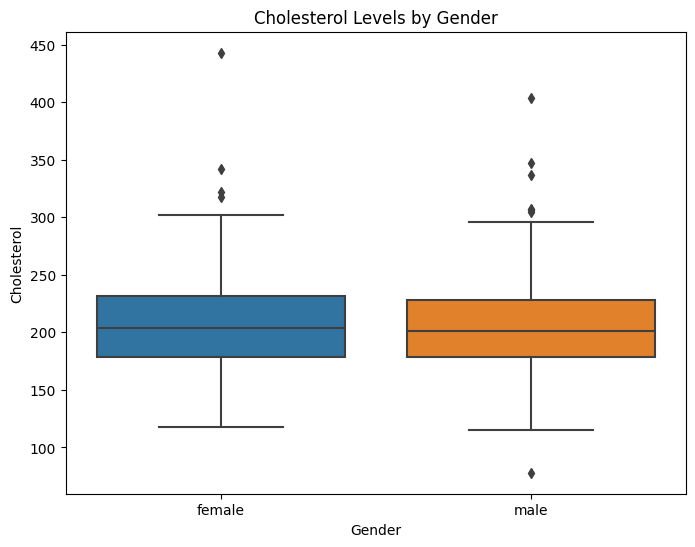

In [34]:
# Plotting a boxplot of cholesterol levels grouped by gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=african_df, x="Gender", y="Cholesterol")
plt.title("Cholesterol Levels by Gender")
plt.show()

`Glucose` vs `Age` (colored by `Diabetes`)

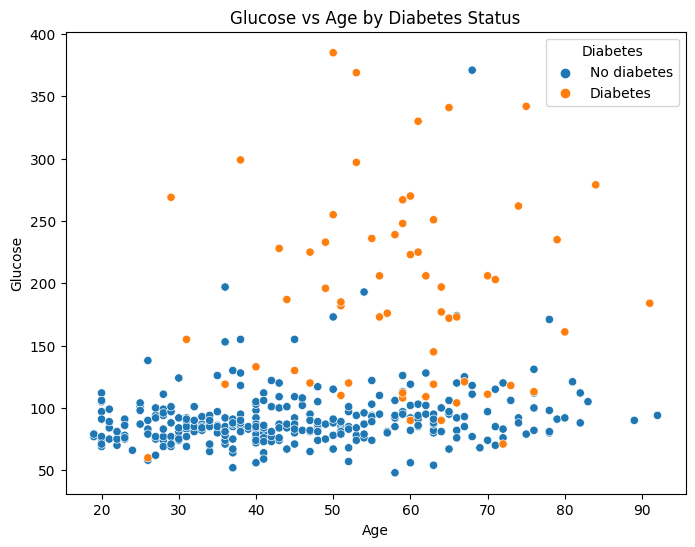

In [35]:
# Plotting Glucose vs Age colored by diabetes status
if 'Glucose' in african_df.columns and 'Age' in african_df.columns and 'Diabetes' in cat_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=african_df, x='Age', y='Glucose', hue='Diabetes')
    plt.title("Glucose vs Age by Diabetes Status")
    plt.show()

`Waist` vs `Hip` (colored by `Gender`)

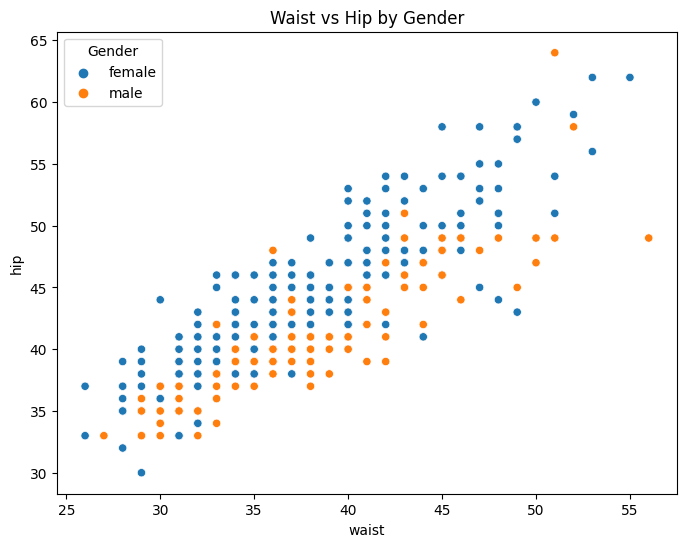

In [36]:
# Plotting Waist vs Hip measurements colored by gender
if 'waist' in african_df.columns and 'hip' in african_df.columns and 'Gender' in cat_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=african_df, x='waist', y='hip', hue='Gender')
    plt.title("Waist vs Hip by Gender")
    plt.show()

`Chol`/`HDL ratio` vs `Age` (colored by `Diabetes`)

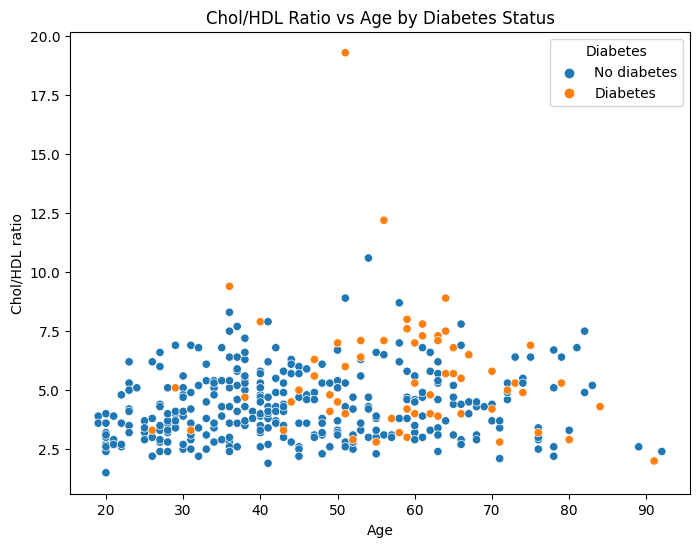

In [37]:
# Plotting Chol/HDL ratio vs Age colored by diabetes status
if 'Chol/HDL ratio' in african_df.columns and 'Age' in african_df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=african_df, x='Age', y='Chol/HDL ratio', hue='Diabetes')
    plt.title("Chol/HDL Ratio vs Age by Diabetes Status")
    plt.show()

`Glucose` by `Diabetes`

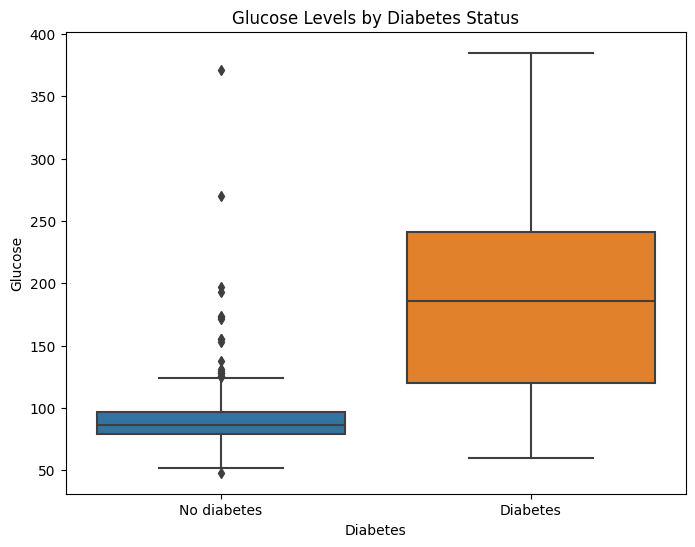

In [38]:
# Plotting a boxplot of glucose levels grouped by diabetes status
if 'Glucose' in african_df.columns and 'Diabetes' in cat_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=african_df, x='Diabetes', y='Glucose')
    plt.title("Glucose Levels by Diabetes Status")
    plt.show()

`BMI` by `Diabetes`

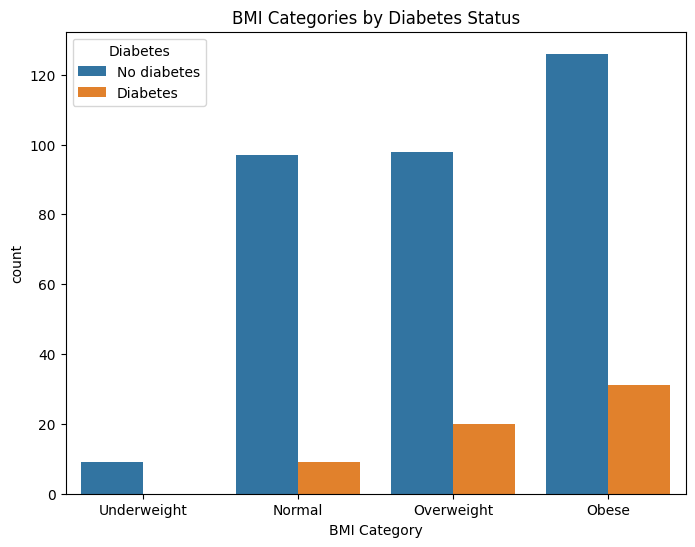

In [39]:
# Plotting BMI categories grouped by diabetes status
if 'BMI' in african_df.columns and 'Diabetes' in cat_columns:
    
    # Categorizing BMI into standard weight groups
    def bmi_category(bmi):
        if bmi < 18.5:
            return "Underweight"
        elif 18.5 <= bmi < 24.9:
            return "Normal"
        elif 25 <= bmi < 29.9:
            return "Overweight"
        else:
            return "Obese"

    # Applying BMI category function to create a new column
    african_df['BMI Category'] = african_df['BMI'].apply(bmi_category)
    
    # Plotting count of BMI categories split by diabetes status
    plt.figure(figsize=(8, 6))
    sns.countplot(data=african_df, x='BMI Category', hue='Diabetes', order=['Underweight', 'Normal', 'Overweight', 'Obese'])
    plt.title("BMI Categories by Diabetes Status")
    plt.show()

`Cholesterol` vs `HDL` (colored by `Diabetes`)

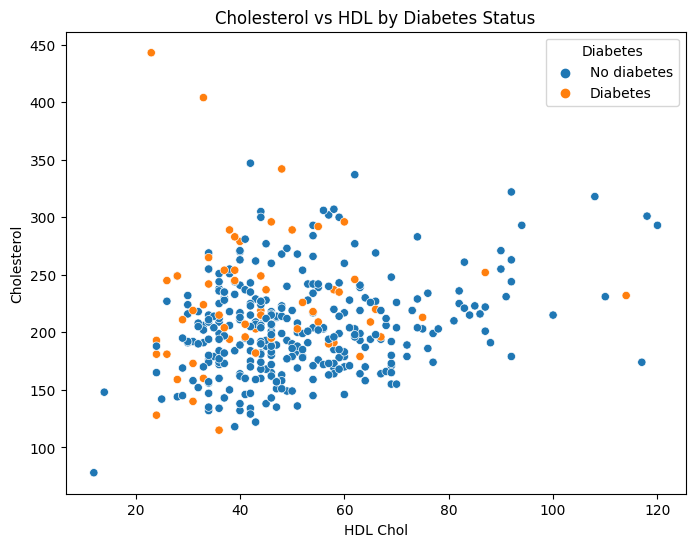

In [40]:
# Plotting total cholesterol vs HDL cholesterol colored by diabetes status
if 'Cholesterol' in african_df.columns and 'HDL Chol' in african_df.columns and 'Diabetes' in cat_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=african_df, x='HDL Chol', y='Cholesterol', hue='Diabetes')
    plt.title("Cholesterol vs HDL by Diabetes Status")
    plt.show()

`Systolic BP` vs `Diastolic BP` (colored by `Diabetes`)

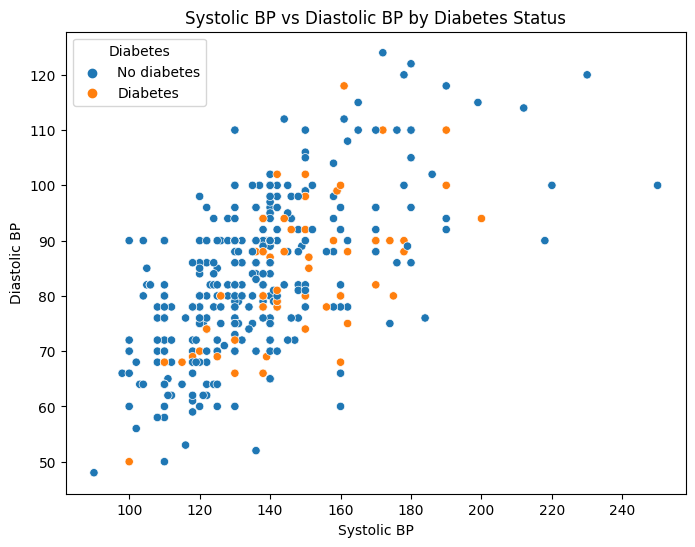

In [41]:
# Plotting systolic vs diastolic blood pressure colored by diabetes status
if 'Systolic BP' in african_df.columns and 'Diastolic BP' in african_df.columns and 'Diabetes' in cat_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=african_df, x='Systolic BP', y='Diastolic BP', hue='Diabetes')
    plt.title("Systolic BP vs Diastolic BP by Diabetes Status")
    plt.show()

`Age` by `Diabetes`

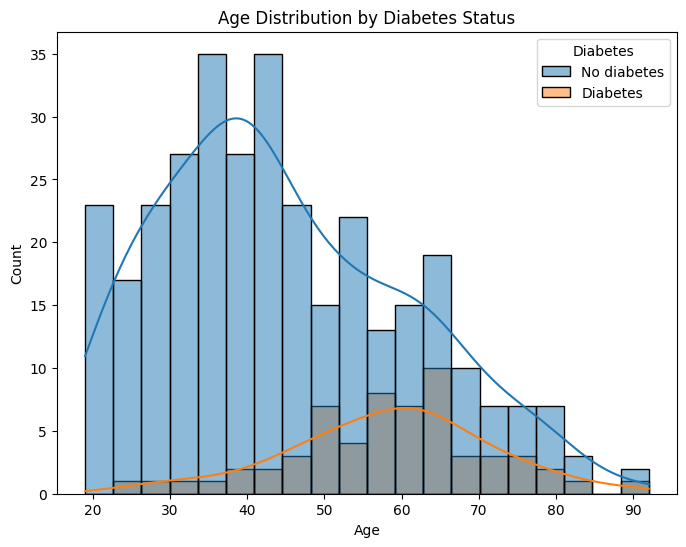

In [42]:
# Plotting age distribution with KDE, colored by diabetes status
if 'Age' in african_df.columns and 'Diabetes' in cat_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=african_df, x='Age', hue='Diabetes', kde=True, bins=20)
    plt.title("Age Distribution by Diabetes Status")
    plt.show()

# Feature Engineering

Label Encode `Gender` column

In [43]:
# Convert Gender to numerical
if 'Gender' in african_df.columns:
    le = LabelEncoder()
    african_df['Gender'] = le.fit_transform(african_df['Gender'])
    print("\n'Gender' column encoded:")
    print(african_df[['Gender']].head())


'Gender' column encoded:
   Gender
0       0
1       0
2       0
3       0
4       0


Encode `Diabetes` column

In [44]:
# Convert Diabetes to numerical
if 'Diabetes' in african_df.columns:
    african_df['Diabetes'] = african_df['Diabetes'].map({'No diabetes': 0, 'Diabetes': 1})
    print("\n'Diabetes' column converted to 0 and 1:")
    print(african_df[['Diabetes']].head())


'Diabetes' column converted to 0 and 1:
   Diabetes
0         0
1         0
2         0
3         0
4         0


Encode `BMI` column

In [45]:
# Convert BMI Categories to numerical
if 'BMI Category' in african_df.columns:
    bmi_mapping = {"Underweight": 0, "Normal": 1, "Overweight": 2, "Obese": 3}
    african_df['BMI Category'] = african_df['BMI Category'].map(bmi_mapping)
    print("\n'BMI Category' column converted to numerical:")
    print(african_df[['BMI Category']].head())


'BMI Category' column converted to numerical:
   BMI Category
0             1
1             2
2             2
3             1
4             1


In [46]:
african_df.head()

,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes,BMI Category
0,193,77,49,3.9,19,0,61,119,22.5,118,70,32,38,0.84,0,1
1,146,79,41,3.6,19,0,60,135,26.4,108,58,33,40,0.83,0,2
2,217,75,54,4.0,20,0,67,187,29.3,110,72,40,45,0.89,0,2
3,226,97,70,3.2,20,0,64,114,19.6,122,64,31,39,0.79,0,1
4,164,91,67,2.4,20,0,70,141,20.2,122,86,32,39,0.82,0,1


# Saving Processed CSV File

In [47]:
"""# Define the exact output file path
output_file_path = 'C:/Users/dahab/OneDrive/Desktop/T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making/processed_datasets/clinical/African_pro.csv'

# Save the updated DataFrame to a CSV file
african_df.to_csv(output_file_path, index=False)

print(f"Updated dataset saved to: {output_file_path}")"""

'# Define the exact output file path\noutput_file_path = \'C:/Users/dahab/OneDrive/Desktop/T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making/processed_datasets/clinical/African_pro.csv\'\n\n# Save the updated DataFrame to a CSV file\nafrican_df.to_csv(output_file_path, index=False)\n\nprint(f"Updated dataset saved to: {output_file_path}")'

# Conclusion

This notebook presented a comprehensive analysis of the African American clinical dataset with a focus on identifying patterns associated with Type 2 Diabetes. The dataset included a wide range of health-related features such as age, BMI, cholesterol levels, blood pressure, and gender, which were thoroughly explored and visualized to assess their relationship with diabetes status.

- **Dataset Overview**:
  - The dataset was cleaned, encoded, and processed to support further modeling efforts.
  - The final DataFrame was exported as `African_pro.csv` for integration into the broader data fusion and prediction pipeline.

- **Key Statistical Insights**:
  - **BMI distribution** showed a strong correlation with diabetes status. Individuals classified as "Obese" had a significantly higher likelihood of having diabetes compared to those with "Normal" or "Underweight" BMI.
  - **Cholesterol vs HDL** scatter plots highlighted differences in lipid profiles between diabetic and non-diabetic groups.
  - **Blood Pressure** analysis revealed that patients with higher systolic and diastolic pressure values were more likely to be diabetic.
  - **Age** trends demonstrated that diabetes prevalence increased with age, which aligns with established clinical patterns.
  - **Gender encoding** and categorical mappings prepared the dataset for machine learning workflows.

- **Feature Engineering**:
  - Key categorical variables including `Gender`, `Diabetes`, and `BMI Category` were successfully encoded for model compatibility.
  - The structure and format of the dataset were standardized to ensure consistent integration with other national datasets.

In summary, the African American clinical dataset provides meaningful insights into the health indicators associated with diabetes. The patterns observed align with medical literature and enhance the dataset’s value as part of a larger, multimodal Type 2 Diabetes prediction system.